In [1]:
import pickle
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

In [10]:
#load pickle
with open("data/ood_classifier_seed0_2023_06_12_20_53_21/outputs.pkl", 'rb') as f:
    outputs = pickle.load(f)

ood_classification = softmax(outputs[1], axis=1)
val_classification = softmax(outputs[0], axis=1)

with open("data/ood_classifier_seed1_2023_06_13_13_47_38/outputs.pkl", 'rb') as f:
    outputs = pickle.load(f)

ood_classification2 = softmax(outputs[1], axis=1)
val_classification2 = softmax(outputs[0], axis=1)

f_star = [-3, -3, -3, -3, -3, 0]

In [11]:
val_ood_score = np.mean([np.mean(val_classification[:, 1]), np.mean(val_classification2[:, 1])])

In [12]:
bins = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
run_names = ["reward_prediction_seed0_2023_06_07_19_01_32", "reward_prediction_seed1_2023_06_08_23_50_15", "reward_prediction_seed2_2023_06_08_23_50_35", "reward_prediction_seed3_2023_06_08_23_50_55", "reward_prediction_seed4_2023_06_08_23_59_43"]
ood_scores= []
dist_to_f_star_all = []
val_dist_to_f_star_all = []
for i in range(len(bins)-1):
    idxs = np.intersect1d( np.where(ood_classification[:, 1]>bins[i] )[0], np.where(ood_classification[:, 1]<bins[i+1])[0])
    # idxs = np.where(ood_classification[:, 1]>bins[i] )[0]
    ood_scores.append(ood_classification2[idxs, 1].mean())

    dist_to_f_star = []
    val_dist_to_f_star = []

    for run_name in run_names:
        with open('data/'+run_name+'/outputs.pkl', 'rb') as f:
            data = pickle.load(f)
            dist_to_f_star.append(np.mean((data[1][idxs] - np.expand_dims(f_star, axis=0))**2))
            val_dist_to_f_star.append(np.mean((data[0] - np.expand_dims(f_star, axis=0))**2))
    dist_to_f_star_all.append(dist_to_f_star)
    val_dist_to_f_star_all.append(val_dist_to_f_star)


/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == "__main__":


Text(0, 0.5, 'Distance to f*')

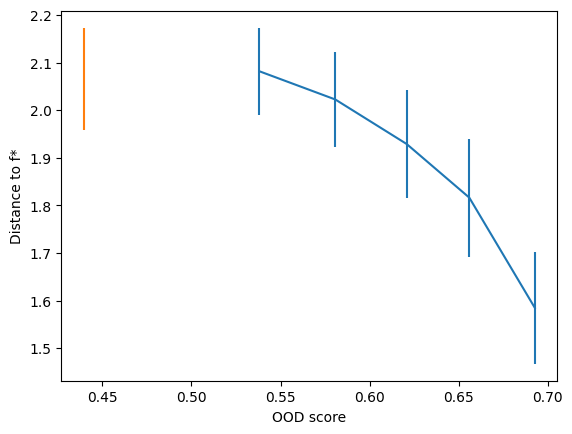

In [13]:
dist_to_f_star_all = np.array(dist_to_f_star_all)
plt.errorbar(ood_scores, dist_to_f_star_all.mean(axis=1), yerr=dist_to_f_star_all.std(axis=1))
plt.errorbar([val_ood_score], [np.mean(val_dist_to_f_star_all)], yerr=[np.std(val_dist_to_f_star_all)])
plt.xlabel("OOD score")
plt.ylabel("Distance to f*")
